# Um breve estudo de Data Science
### Fala galera, sou o Murilo do time de Suporte da Cod3r e nesse notebook vou trazer um pouco de como se trabalhar com Data Science

O conjunto de dados utilizados vai ser o [Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic).

Vamos criar um modelo de classificação de sobreviventes e não sobreviventes utilizando a implementação de alguns modelos supervisionado em Python para classificação. Mas antes disso vamos realizar algumas atividades, tais como EDA (Exploração de Dados) e o processo de pré-processamento dos dados. Vai ser criado um modelo de classificação binária onde só temos dois rótulos 0 = Não sobreviveu e 1 = sobreviveu.


## O Dicionário dos Dados


| Variable | Definition/Definição | Key/Chave |
| --- | --- | --- |
| Survival | Survival/Sobrevivente | 0 = Não, 1 = Sim |
| Pclass | Classe de ingresso | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sexo |  |
| Age | Idade em anos |  |
| sibsp | Quantidade de irmãos ou cônjuge a bordo do Titanic | |
| Parch | Quantidade de pais ou filhos a bordo do Titanic |  |
| Ticket | Número do ticket  |  |
| fare | Tarifa do passageiro |  |
| cabin | Número da cabine |  |
| embarked | Portão de Embarque | (C=Cherbourg, Q=Queenstown, S=Southampton) |

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acessando os dados
* Vamos acessar os dados através do **pandas**, uma biblioteca muito útil para análise e manipulação de dados de código aberto, poderosa e fácil de usar
* Para visualizar os 5 primeiros elementos do data set de treino, vamos usar **data.head()**

In [2]:
data = pd.read_csv("./datasets/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Começando o EDA
* **data.info()** - Este método imprime informações sobre um DataFrame incluindo o índice dtype e colunas, valores não nulos e uso de memória.
* **data.describe()** - Gera estatísticas descritivas. As estatísticas descritivas incluem aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analisando a quantidade de valores NaN por coluna do conjunto de dados

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Análise da Coluna de Sobreviventes

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

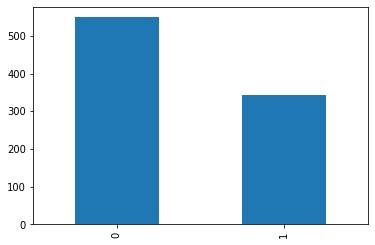

In [7]:
data['Survived'].value_counts().plot.bar()

### Análise da Coluna de Sobreviventes pela sua Classe 
* Aqui fazemos o agrupamento de sobrevientes por classe, onde denotamos a quantidade de sobreviventes por classe dentro do Titanic

In [8]:
survivors_by_class = data.groupby(['Survived', 'Pclass']).agg('Survived').count()
survivors_by_class

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived,Pclass'>

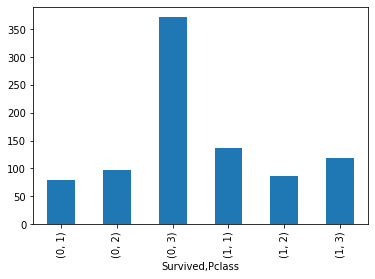

In [9]:
survivors_by_class.plot.bar()

### Agora vamos aplicar o Pré-processamento
* Vamos preencher os dados da coluna Age, que possuem NaN. Para isso, iremos aplicar uma técnica de substituir pela idade mediana de todos os passageiros.
* Também iremos aplicar o **One-Hot-Encoding** na coluna Sex, isso nada mais é do que transformar a coluna que possui uma variável qualitativa em uma variável quantitativa.
* Sexo :
    * feminino = 0
    * masculino  = 1

In [10]:
data.fillna(data['Age'].mean(), inplace = True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Vamos remover os seguintes atributos: Name, Ticket, PassengerId e Cabin


* Para isso utiliza-se data.drop([colunas], axis = 1, inplace = True)

In [12]:
data.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Agora vamos aplicar o One-Hot-Enconding

In [14]:
sex = pd.get_dummies(data['Sex'], prefix='Sex', drop_first=True)
data['Sex'] = sex
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


### Vamos aplicar o mesmo processo de One-Hot-Enconding para a coluna Embakerd e criando novas colunas em relação ao portão de embarque

In [15]:
embarked = pd.get_dummies(data['Embarked'], prefix='Embarked', drop_first=True)
data.drop(['Embarked'],axis=1,inplace=True)
data = pd.concat([data,embarked],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Fazendo uma análise de sobreviventes pelo sexo

In [16]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

<AxesSubplot:>

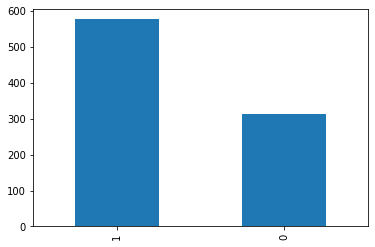

In [17]:
data['Sex'].value_counts().plot.bar()

In [18]:
survivors_by_sex = data.groupby(['Survived', 'Sex']).agg('Survived').count()
survivors_by_sex

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived,Sex'>

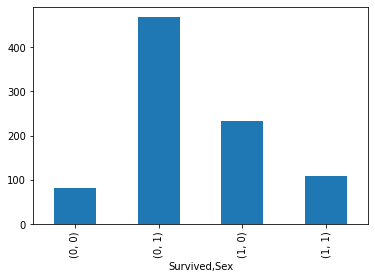

In [19]:
survivors_by_sex.plot.bar()

##### Analisando o gráfico de barras fica visivél que a maior quantidade de sobreviventes foi do sexo feminino

### Análise dos Sobreviventes por Sexo e sua Classe ocupante dentro do Titanic.

In [20]:
data.groupby(['Survived', 'Pclass','Sex']).agg('Survived').count()

Survived  Pclass  Sex
0         1       0        3
                  1       77
          2       0        6
                  1       91
          3       0       72
                  1      300
1         1       0       91
                  1       45
          2       0       70
                  1       17
          3       0       72
                  1       47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived,Pclass,Sex'>

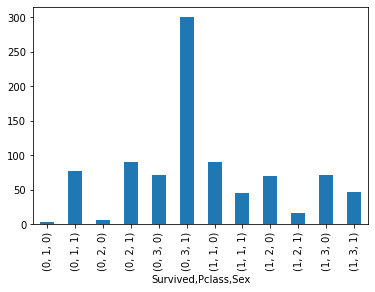

In [21]:
data.groupby(['Survived', 'Pclass','Sex']).agg('Survived').count().plot.bar()

## Agora vamos começar outro tipo de análise, para tentar achar outliers
### O que são outliers ?
* Outliers são dados que se diferencia dos demais dados do conjunto, os outliers podem ficam além do **limite teórico inferior ou superior**.
* LTI (Limite teórico Inferior)
    * $ LTI = MA - 2 * DP $
* LTS (Limite teórico Superior)
    * $ LTS = MA + 2 * DP $
    
### Notações das variáveis
* MA = Média Aritmética
* DP = Desvio Padrão

#### Para isso iremos utilizar a biblioteca de visualização **Seaborn**

<AxesSubplot:xlabel='Age'>

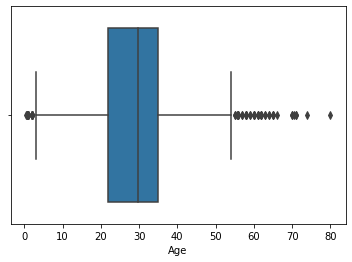

In [22]:
sns.boxplot(x = data['Age'])

<AxesSubplot:xlabel='SibSp'>

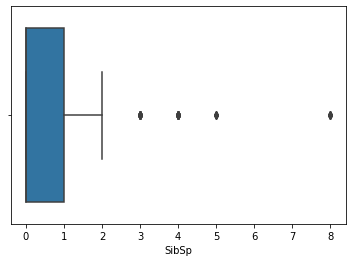

In [23]:
sns.boxplot(x = data['SibSp'])

In [24]:
def outliers(data, feature):
    mean = data[feature].mean()
    std = data[feature].std()
    
    lti = mean - 2*std
    lts = mean + 2*std
    
    outliers_list = []
    for idx, row in data.iterrows():
        if row[feature] < lti:
            outliers_list.append(row[feature])
        if row[feature] > lts:
            outliers_list.append(row[feature])
    return outliers_list

In [25]:
outliers_age = outliers(data, 'Age')
print(outliers_age)

[2.0, 58.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 58.0, 2.0, 59.0, 62.0, 3.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 3.0, 60.0, 3.0, 1.0, 1.0, 3.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [26]:
outliers_sibsp = outliers(data, 'SibSp')
print(outliers_sibsp)

[3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 5.0, 3.0, 3.0, 4.0, 8.0, 4.0, 4.0, 3.0, 8.0, 4.0, 8.0, 3.0, 4.0, 4.0, 4.0, 4.0, 8.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 8.0, 4.0, 3.0, 4.0, 8.0, 4.0, 8.0]


### Aqui temos um mapa de calor, mostrando a correlação entre os atributos sem o atributo Survived,a barra na lateral mostra a magnetude entre os atributos onde variam de -1 a 1
* -1 fraco.
* 1 forte.

<AxesSubplot:>

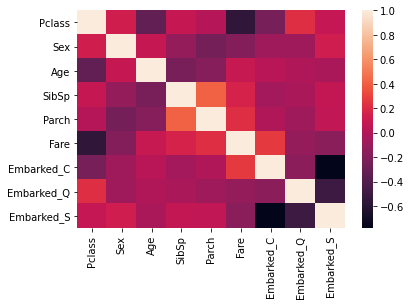

In [27]:
correlation = data.drop('Survived',axis = 1).corr()
sns.heatmap(correlation)

## Plotando os atributos mais importantes

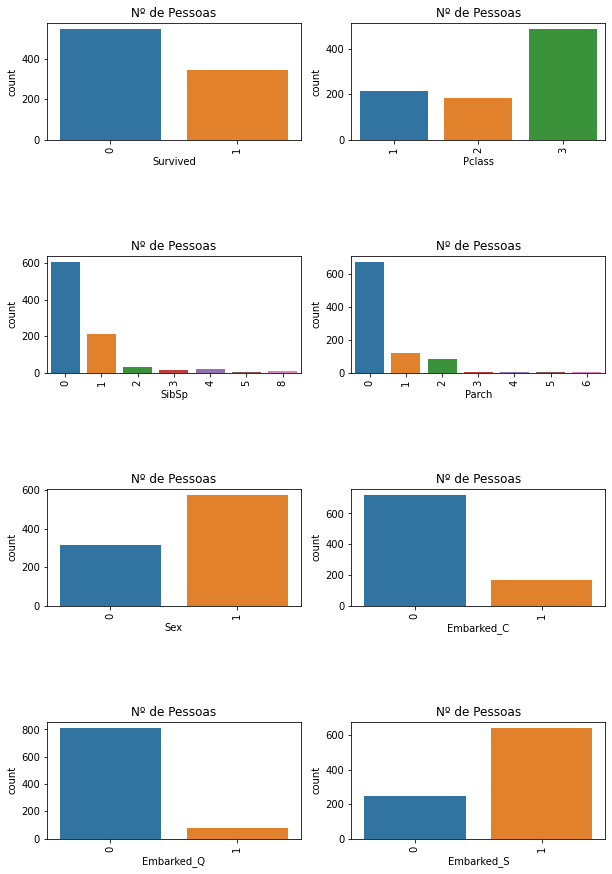

In [28]:
fig = plt.subplots(figsize = (10,15))
features = data[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j, data = data)
    plt.xticks(rotation = 90)
    plt.title("Nº de Pessoas")

#### Podemos retirar os outliers de dentro dos dados, pois eles podem viesar todo o resultado de uma análise. Outro ponto a ser considerado é que o comportamento dos outliers pode ser justamente o que está sendo procurado. Mas, de início vamos trabalhar com os dados enviesados.
#### Fica o desafio para você retirar os outliers de dentro dos dados e quais atributos você deve retirar com base nas análises iniciais dos dados.

## Contruindo os modelos de Naive Bayes e Decision Tree

### Divisão do conjunto de dados em 70/30 Test-Train
* train = 70% dos dados
* test = 30% dos dados

### Como estamos construindo um modelo binário para classificar os sobreviventes.
Para isso fazemos:
  * **X = data.drop(etiqueta, axis = 1)**, aqui estamos criando os dados de características dos sobreviventes.
  * **Y = data[etiqueta]**, aqui criamos as etiquetas dos dados.

In [29]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived',axis = 1)
Y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=100)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Classificador Gaussiano

In [31]:
classifier_gnb = GaussianNB() 
classifier_gnb.fit(X_train, y_train) 

GaussianNB()

### Classificador árvore de decisão

In [32]:
classifier_dt = DecisionTreeClassifier(random_state = 100, max_depth = 5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

In [33]:
predictions_gnb = classifier_gnb.predict(X_test)
predictions_gnb

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

In [34]:
predictions_dt = classifier_dt.predict(X_test)
predictions_dt

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0])

## Avaliação dos modelos

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Um resumo sobre as métricas avaliativas

* **accuracy ou acuracia** esta função calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto correspondente de rótulos em y_true.

* A **precision ou precisão** é a proporção em que está o número de verdadeiros positivos e o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador de não rotular como positiva uma amostra negativa. O melhor valor é 1 e o pior valor é 0.

* O **recall ou cobertura** é a proporção em que está o número de verdadeiros positivos e o número de falsos negativos. O recall é intuitivamente a capacidade do classificador de encontrar todas as amostras positivas. O melhor valor é 1 e o pior valor é 0.

* A pontuação **F1** pode ser interpretada como uma média ponderada da precisão e recuperação, onde uma pontuação F1 atinge seu melhor valor em 1 e a pior pontuação em 0.

### Podemos verificar a precisão, o recall, o f1-score usando o relatório de classiicação!

In [36]:
print("Gaussian Naive Bayes model\n")
print(classification_report(y_test, predictions_gnb))
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, predictions_gnb)*100)

Gaussian Naive Bayes model

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       159
           1       0.76      0.72      0.74       109

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268

Gaussian Naive Bayes model accuracy(in %): 79.47761194029852


In [37]:
print("Decision Tree model\n")
print(classification_report(y_test, predictions_dt))
print("Decision Tree model accuracy(in %):", accuracy_score(y_test, predictions_dt)*100)

Decision Tree model

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       159
           1       0.80      0.68      0.74       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

Decision Tree model accuracy(in %): 80.22388059701493


### Matriz de confusão

* Uma **matriz de confusão** é uma tabela que indica os erros e acertos do seu modelo, comparando com o resultado esperado (ou etiquetas/labels)

In [38]:
confusion_matrix(y_test,predictions_gnb)

array([[135,  24],
       [ 31,  78]])

### Plotando a matriz de confusão

In [39]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [40]:
cnf_matrix = confusion_matrix(y_test, predictions_gnb, labels=[1,0])

Confusion matrix
[[ 78  31]
 [ 24 135]]


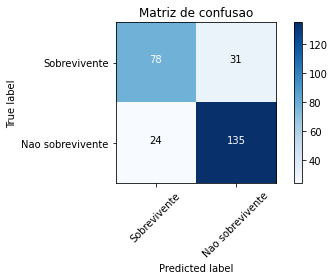

In [41]:
plot_confusion_matrix(cnf_matrix, classes=['Sobrevivente','Nao sobrevivente'],
                      title='Matriz de confusao')

### Curva ROC AUC

* **ROC** é uma curva de probabilidade que traçar a taxa de verdadeiros positivos contra a taxa de falsos positivos. Isso implica na taxa de acertos contra erros que o classificador acertou
* **AUC** resume a curva ROC num único valor, calculando a “área sob a curva”, quanto mais a curva se aproximar de 1 melhor está a taxa de acertos do classificador, caso contrário o classificador não está acertando os labels.

In [42]:
from sklearn.metrics import roc_curve  

In [43]:
def plot_roc_cur(fper, tper, acc):  
    plt.plot(fper, tper, color='orange', label='AUC ' + str(acc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva (ROC AUC)')
    plt.legend()

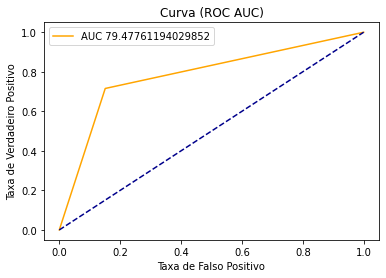

In [44]:
acc_gnb = accuracy_score(y_test, predictions_gnb)*100

fper, tper, _ = roc_curve(y_test, predictions_gnb)
plot_roc_cur(fper, tper, acc_gnb)

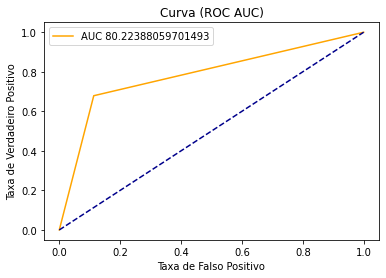

In [45]:
acc_dt = accuracy_score(y_test, predictions_dt)*100

fper, tper, _ = roc_curve(y_test, predictions_dt)
plot_roc_cur(fper, tper, acc_dt)

## Referências

#### [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis#:~:text=In%20statistics%2C%20exploratory%20data%20analysis,modeling%20or%20hypothesis%20testing%20task.)
#### [Supervised learning¶](https://scikit-learn.org/stable/supervised_learning.html)
##### [Receiver operating characteristic (ROC)]( https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
#### [O que é AUC e ROC nos modelos de Machine Learning](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)
#### [Métricas de Avaliação: acurácia, precisão, recall… quais as diferenças?](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c)